## 神经元和激活函数



在输出的判断上，其实不仅可以简单的按照阈值来判断，可以通过一个函数来进行计算，这个函数称为<span class="motutor-highlight motutor-id_3zaaj47-id_aph5eog"><i></i>**激活函数**</span>。

常见的激活函数有： sigmoid，tanh，relu 等。



**为什么多层感知机（即前馈神经网络）需要激活函数？**

1. 在无激活函数的情况下，神经元的输出就是输入与对应参数的乘积之和，或许再加一个偏置，但是这些都是线性的。

2. 不加激活函数，线性的感知机的堆叠依然是一个线性的函数。

3. 实际场景中很多问题不是线性可分的。激活函数的作用，就是让神经元的输出有一定的非线性的性质。

4. 连续可导性


运行下面的程序可以得到 `sigmoid` 函数的图像，该函数是一个非线性的函数，当使用该函数作为激活函数时，可以将简单的权重与输入的乘积和从一个线性的空间映射到一个非线性的空间。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


def plot_activation_function(activation_function):
    """
    绘制激活函数
    :param activation_function: 激活函数名
    :return:
    """
    x = np.arange(-10, 10, 0.1)
    y_activation_function = activation_function(x)

    # 绘制坐标轴
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data', 0))

    # 绘制曲线图
    plt.plot(x, y_activation_function)
    
    # 展示函数图像
    plt.show()

#### 1. <span class="motutor-highlight motutor-id_4d1m5gd-id_nqcd7bp"><i></i>sigmoid函数</span>

Sigmoid函数是一个在生物学中常见的S型函数，也称为S型生长曲线。在信息科学中，由于其单增以及反函数单增等性质，Sigmoid函数常被用作神经网络的阈值函数，将变量映射到0,1之间。

$$ f(x) = \frac{1}{1+e^{-x}}$$

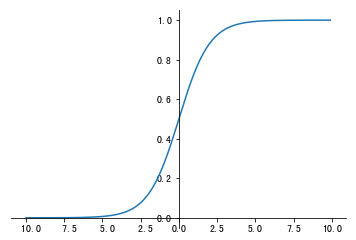

In [3]:
def sigmoid(x):
    """
    sigmoid函数
    :param x: np.array 格式数据
    :return: sigmoid 函数
    """
    return 1 / (1 + np.exp(-x))


# 绘制 sigmoid 函数图像
plot_activation_function(sigmoid)

优点：
+ Sigmoid 函数的输出映射在(0,1)之间，单调连续，输出范围有限，优化稳定，可以用作输出层。它在物理意义上最为接近生物神经元。
+ 求导容易。

缺点：
+ 由于其软饱和性，容易产生梯度消失，导致训练出现问题。
+ 其输出并不是以0为中心的。

#### 2. <span class="motutor-highlight motutor-id_i66fg5b-id_w78s1sf"><i></i>tanh函数</span>
tanh是双曲函数中的一个，$Tanh()$为双曲正切。在数学中，双曲正切“Tanh”是由基本双曲函数双曲正弦和双曲余弦推导而来。

公式如下:

$$ f(x) = \frac{1-e^{-2x}}{1+e^{-2x}}$$

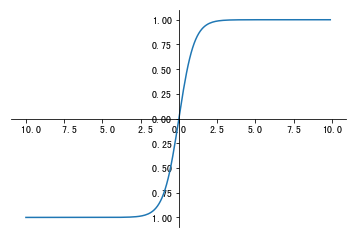

In [4]:
def tanh(x):
    """
    tanh函数
    :param x: np.array 格式数据
    :return: tanh 函数
    """
    return ((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)))


# 绘制 tanh 函数图像
plot_activation_function(tanh)

优点：
+ 比Sigmoid函数收敛速度更快。
+ 相比Sigmoid函数，其输出以0为中心。

缺点：
+ 还是没有改变Sigmoid函数的最大问题——由于饱和性产生的梯度消失。

#### 3. <span class="motutor-highlight motutor-id_xz1xabw-id_cj3hicn"><i></i>ReLU函数</span>

Relu激活函数（The Rectified Linear Unit），用于隐层神经元输出。公式如下：

$$ f(x) = max(0, x)$$

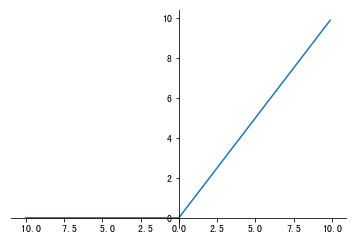

In [5]:
def relu(x):
    """
    relu 函数
    :param x: np.array 格式数据
    :return: relu 函数
    """
   
    temp = np.zeros_like(x)
    if_bigger_zero = (x > temp)
    return x * if_bigger_zero


# 绘制 relu 函数
plot_activation_function(relu)

优点：
+ 因为它线性、非饱和的形式，ReLU在SGD中能够快速收敛。
+ 有效缓解了梯度消失的问题。
+ 提供了神经网络的稀疏表达能力。

缺点：
+ 随着训练的进行，可能会出现神经元死亡，权重无法更新的情况。如果发生这种情况，那么流经神经元的梯度从这一点开始将永远是0。也就是说，ReLU神经元在训练中不可逆地死亡了。